In [1]:
import pandas as pd
import glob,os
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("paper")
sns.set_style("darkgrid")

In [2]:
train_df=pd.read_csv("assignment4.1a.csv")
train_df["Date"]=pd.to_datetime(train_df["Date"],format="%Y-%m-%d")
test_df=pd.read_csv("assignment4.1b.csv")
test_df["Date"]=pd.to_datetime(test_df["Date"],format="%Y-%m-%d")
prod_conv=pd.read_csv("assignment4.1c.csv")
global promo_dates
promo_dates=pd.read_csv("PromotionDates.csv") # Something was wrong with this df i fixed it.
promo_dates["StartDate"]=pd.to_datetime(promo_dates["StartDate"],format="%m/%d/%Y")
promo_dates["EndDate"]=pd.to_datetime(promo_dates["EndDate"],format="%m/%d/%Y")
train_df.head()

,Date,StoreCode,ProductCode,SalesQuantity
0,2015-01-01,8,9,-1
1,2015-01-01,131,9,1
2,2015-01-01,144,9,2
3,2015-01-01,203,9,2
4,2015-01-01,256,9,0


In [3]:
promo_dates

,Period,StartDate,EndDate
0,Promo1,2015-02-10,2015-02-17
1,Promo2,2015-03-15,2015-03-22
2,Promo3,2015-05-24,2015-06-01
3,Promo4,2015-06-21,2015-06-28
4,Promo5,2015-09-01,2015-09-06
5,Promo6,2015-11-20,2015-11-27


In [5]:
def check_if_promo(date):
    for i,row in promo_dates.iterrows():
        if row["StartDate"]<=date<=row["EndDate"]:
            return 1
    return 0

In [6]:
promos_binary=pd.DataFrame()
promos_binary["Date"]=pd.date_range("2015-01-01","2016-01-02")
promos_binary["IsPromotion"]=promos_binary["Date"].apply(check_if_promo)
promos_binary.sample(10)

,Date,IsPromotion
352,2015-12-19,0
130,2015-05-11,0
218,2015-08-07,0
285,2015-10-13,0
4,2015-01-05,0
88,2015-03-30,0
205,2015-07-25,0
336,2015-12-03,0
333,2015-11-30,0
277,2015-10-05,0


In [18]:
# fig,ax=plt.subplots(nrows=2,figsize=(19,10))
# sns.lineplot(x=sales_df.Date.values,y=sales_df.SalesQuantity.values,ax=ax[0],color="green")
# sns.lineplot(x="Date",y="SalesQuantity",data=sales_prods,ax=ax[1],hue="ProductCode")
# [ax[0].axvspan(promo_dates.loc[promo_dates["Period"]==promo].values[0][1],promo_dates.loc[promo_dates["Period"]==promo].values[0][2]) for promo in promo_dates["Period"].values[:-2]]
# [ax[1].axvspan(promo_dates.loc[promo_dates["Period"]==promo].values[0][1],promo_dates.loc[promo_dates["Period"]==promo].values[0][2]) for promo in promo_dates["Period"].values[:-2]];

In [21]:
sales=train_df.loc[train_df["SalesQuantity"]>0].copy()
returns=train_df.loc[train_df["SalesQuantity"]<0].copy()
# pd.pivot_table(sales,values=["SalesQuantity"],columns=["ProductCode"],index=["Date","StoreCode"])

In [22]:
pd.pivot_table(returns,index="ProductCode",values=["SalesQuantity"],aggfunc="sum").sort_values(by=["SalesQuantity"]).head()
# 126, 167, 256, 257, 166 has the most returns

,SalesQuantity
ProductCode,
126,-1121
167,-663
256,-640
257,-637
166,-545


c:\python\python36\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\python\python36\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


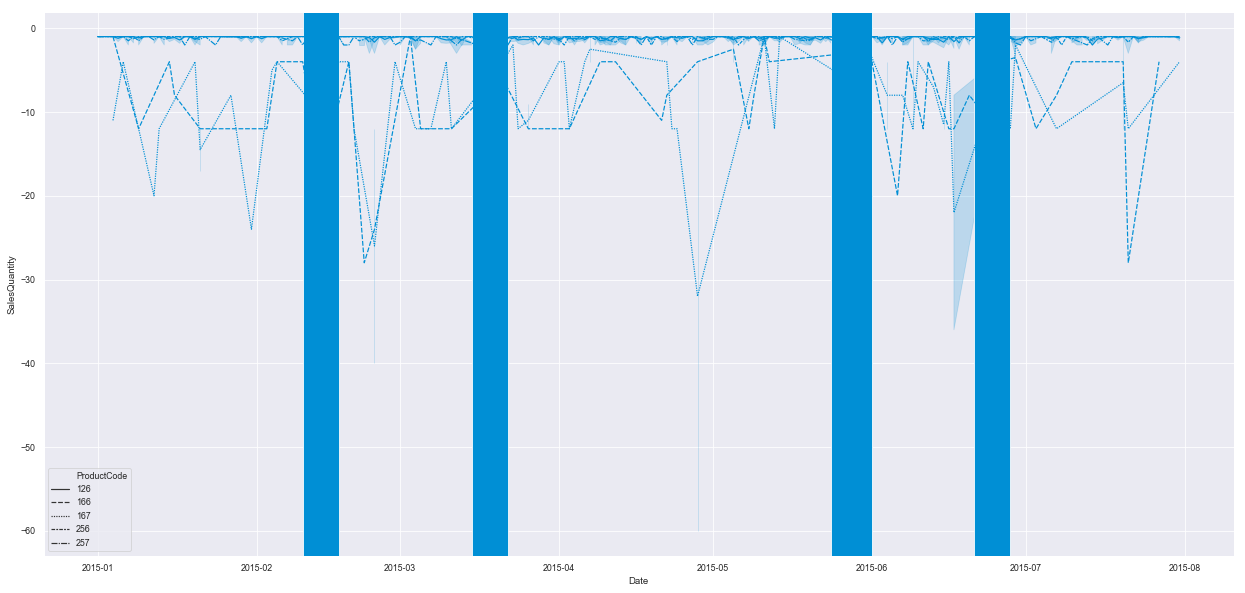

In [24]:
plt.figure(figsize=(19,10))
sales_prods=returns[returns["ProductCode"].isin([126, 167, 256, 257, 166])]
sns.lineplot(x="Date",y="SalesQuantity",data=sales_prods,style="ProductCode")
[plt.axvspan(promo_dates.loc[promo_dates["Period"]==promo].values[0][1],promo_dates.loc[promo_dates["Period"]==promo].values[0][2]) for promo in promo_dates["Period"].values[:-2]];

### Fast, Medium and Slow stores and items

#### Stores

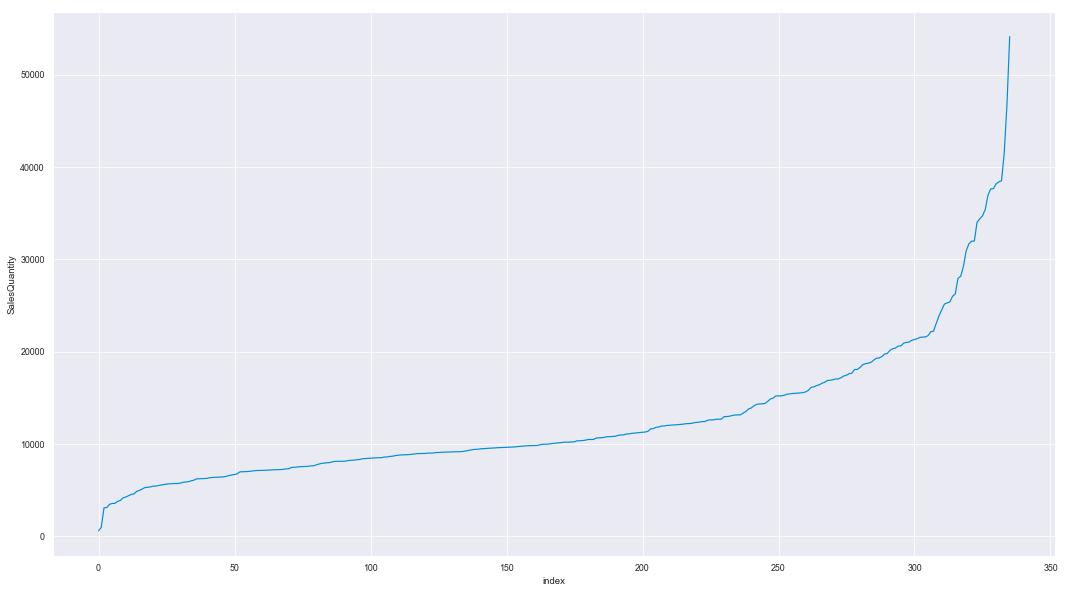

In [25]:
plt.figure(figsize=(16,10))
sales_agg_by_store=pd.pivot_table(sales,values="SalesQuantity",index="StoreCode",aggfunc="sum").sort_values(by="SalesQuantity").reset_index().reset_index()
sns.lineplot(x="index",y="SalesQuantity",data=sales_agg_by_store)

In [26]:
sales_agg_by_store["store_type"]=sales_agg_by_store["index"].apply(lambda x:"Slow" if x<=202 else "Medium" if 202<x<307 else "Fast")
# sales_agg_by_store.to_csv("store_type.csv",index=False)

#### Items

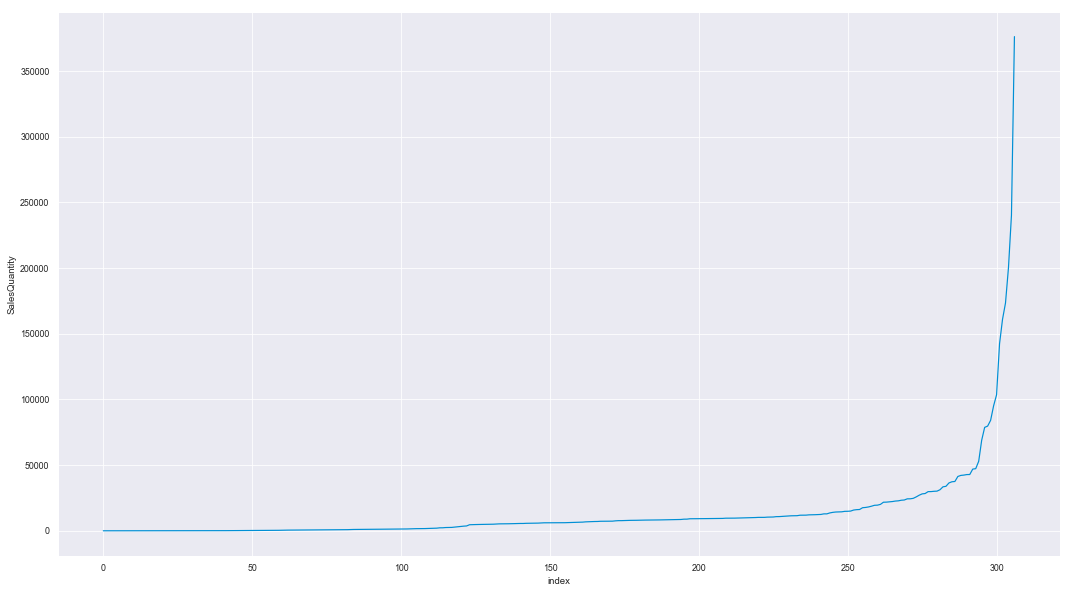

In [27]:
plt.figure(figsize=(16,10))
sales_agg_by_product=pd.pivot_table(sales,values="SalesQuantity",index="ProductCode",aggfunc="sum").sort_values(by="SalesQuantity").reset_index().reset_index()
sns.lineplot(x="index",y="SalesQuantity",data=sales_agg_by_product)

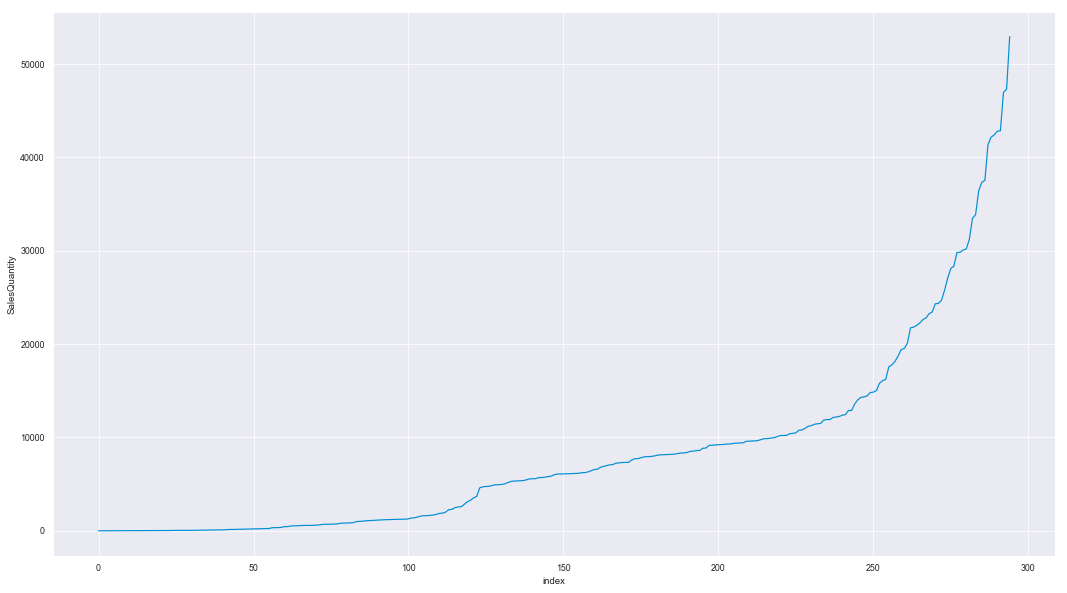

In [28]:
plt.figure(figsize=(16,10))

sns.lineplot(x="index",y="SalesQuantity",data=sales_agg_by_product.iloc[:295])

In [29]:
sales_agg_by_product["prod_type"]=sales_agg_by_product["index"].apply(lambda x:"Slow" if x<=260 else "Medium" 
                                                                                      if 260<x<295 else "Fast")
# sales_agg_by_product.to_csv("product_type.csv",index=False)

In [30]:
sales_agg_by_store=sales_agg_by_store[["StoreCode","store_type"]]

In [31]:
sales_agg_by_product=sales_agg_by_product[["ProductCode","prod_type"]]

#### Adding promotion field to the main data

In [33]:
train_transf=pd.merge(train_df,promos_binary,how="left",on="Date")
test_transf=pd.merge(test_df,promos_binary,how="left",on="Date")
train_transf=pd.merge(train_transf,prod_conv,how="left",on="ProductCode")
test_transf=pd.merge(test_transf,prod_conv,how="left",on="ProductCode")

In [34]:
sales=train_transf[train_df["SalesQuantity"]>0]
sales=pd.pivot_table(sales,columns="ProductCode",values="SalesQuantity",index="Date",aggfunc="sum").fillna(0)
sales=pd.merge(sales,promos_binary,on="Date",how="left")

#### Finding the most quantity increasing product in promotions

In [39]:
mean_sales_prom=sales[sales["IsPromotion"]==1].mean()
mean_sales_wo_prom=sales[sales["IsPromotion"]==0].mean()
sales_diff=pd.DataFrame([mean_sales_wo_prom[:-1],mean_sales_prom[:-1]]).T
sales_diff.columns=["before_promotion","in_promotion"]
sales_diff["increase"]=(sales_diff["in_promotion"]-sales_diff["before_promotion"])
sales_diff=pd.merge(sales_diff.reset_index(),sales_agg_by_product,left_on="index",right_on="ProductCode",how="left")
del sales_diff["index"]
sales_diff=sales_diff.sort_values(by="increase",ascending=False)
sales_diff.head(10)

,before_promotion,in_promotion,increase,ProductCode,prod_type
251,147.128492,232.606061,85.477569,256.0,Slow
326,242.128492,326.636364,84.507872,NaN,NaN
271,207.893855,289.303030,81.409176,276.0,Slow
115,161.910615,240.393939,78.483325,117.0,Slow
233,153.089385,221.363636,68.274251,238.0,Medium
299,128.061453,191.848485,63.787032,304.0,Slow
201,114.508380,174.545455,60.037075,205.0,Fast
58,169.837989,219.696970,49.858981,60.0,Slow
6,91.553073,140.696970,49.143897,7.0,Slow
296,170.061453,217.575758,47.514305,301.0,Slow


In [40]:
sales=train_transf[train_df["SalesQuantity"]>0]
sales=pd.pivot_table(sales,columns="StoreCode",values="SalesQuantity",index="Date",aggfunc="sum").fillna(0)
sales=pd.merge(sales,promos_binary,on="Date",how="left")

#### Finding the most percent increase of stores in promotions

In [42]:
mean_sales_prom=sales[sales["IsPromotion"]==1].mean()
mean_sales_wo_prom=sales[sales["IsPromotion"]==0].mean()
sales_diff=pd.DataFrame([mean_sales_wo_prom[:-1],mean_sales_prom[:-1]]).T
sales_diff.columns=["before_promotion","in_promotion"]
sales_diff["percent_increase"]=(sales_diff["in_promotion"]-sales_diff["before_promotion"])/sales_diff["before_promotion"]
sales_diff=pd.merge(sales_diff.reset_index(),sales_agg_by_store,left_on="index",right_on="StoreCode",how="left")
del sales_diff["index"]
sales_diff=sales_diff.sort_values(by="percent_increase",ascending=False)
sales_diff.head(10)

,before_promotion,in_promotion,percent_increase,StoreCode,store_type
90,14.882682,33.757576,1.268246,92,Slow
161,15.128492,25.878788,0.710599,164,Slow
143,66.564246,112.939394,0.696698,145,Medium
179,42.614525,70.545455,0.655432,183,Slow
185,37.698324,61.242424,0.624540,189,Slow
25,38.547486,62.454545,0.620198,27,Slow
279,52.044693,83.121212,0.597112,284,Medium
129,70.469274,112.333333,0.594075,131,Medium
103,13.290503,21.151515,0.591476,105,Slow
272,53.145251,84.363636,0.587416,277,Medium


#### Adding day, month, weekday and the Store and Item types to the data in order to feed to models

In [38]:
train_transf=pd.merge(train_transf,sales_agg_by_store,how="left",on="StoreCode")
train_transf=pd.merge(train_transf,sales_agg_by_product,how="left",on="ProductCode")
train_transf["day"]=train_transf.Date.apply(lambda x: x.day)
train_transf["month"]=train_transf.Date.apply(lambda x: x.month)
train_transf["weekday"]=train_transf.Date.apply(lambda x: x.weekday())

In [44]:
test_transf=pd.merge(test_transf,sales_agg_by_store,how="left",on="StoreCode")
test_transf=pd.merge(test_transf,sales_agg_by_product,how="left",on="ProductCode")
test_transf["day"]=test_transf.Date.apply(lambda x: x.day)
test_transf["month"]=test_transf.Date.apply(lambda x: x.month)
test_transf["weekday"]=test_transf.Date.apply(lambda x: x.weekday())

In [45]:
train_transf=train_transf.fillna("Slow")
test_transf=test_transf.fillna("Slow")

In [46]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [47]:
X_train,X_test,y_train,y_test=train_test_split(train_transf.drop(columns=["Date","month","SalesQuantity"]),train_transf.SalesQuantity.values,test_size=0.2)
cat_vars=["StoreCode","ProductCode","IsPromotion","ProductGroup1","ProductGroup2","store_type","prod_type","weekday"]
cat_vars=[X_train.columns.tolist().index(i) for i in cat_vars]

model=CatBoostRegressor(learning_rate=0.15,num_boost_round=1100,early_stopping_rounds=200,task_type="GPU")
model.fit(X_train,y_train,
         eval_set=[(X_test,y_test)],cat_features=cat_vars)

0:	learn: 5.3022323	test: 5.5051701	best: 5.5051701 (0)	total: 1.31s	remaining: 24m 1s
1:	learn: 5.1625739	test: 5.3697499	best: 5.3697499 (1)	total: 2.21s	remaining: 20m 16s
2:	learn: 5.0446832	test: 5.2548833	best: 5.2548833 (2)	total: 2.58s	remaining: 15m 42s
3:	learn: 4.9471239	test: 5.1598507	best: 5.1598507 (3)	total: 3.01s	remaining: 13m 44s
4:	learn: 4.8663059	test: 5.0820950	best: 5.0820950 (4)	total: 3.6s	remaining: 13m 7s
5:	learn: 4.7978645	test: 5.0157992	best: 5.0157992 (5)	total: 4.06s	remaining: 12m 21s
6:	learn: 4.7375095	test: 4.9567460	best: 4.9567460 (6)	total: 4.55s	remaining: 11m 49s
7:	learn: 4.6866382	test: 4.9078256	best: 4.9078256 (7)	total: 5.18s	remaining: 11m 46s
8:	learn: 4.6471107	test: 4.8683332	best: 4.8683332 (8)	total: 5.71s	remaining: 11m 31s
9:	learn: 4.6124246	test: 4.8341305	best: 4.8341305 (9)	total: 6.18s	remaining: 11m 13s
10:	learn: 4.5821739	test: 4.8046748	best: 4.8046748 (10)	total: 6.67s	remaining: 11m
11:	learn: 4.5563612	test: 4.7795383	

93:	learn: 4.3076929	test: 4.5273788	best: 4.5273788 (93)	total: 53.8s	remaining: 9m 35s
94:	learn: 4.3072090	test: 4.5269247	best: 4.5269247 (94)	total: 54.3s	remaining: 9m 34s
95:	learn: 4.3065560	test: 4.5262047	best: 4.5262047 (95)	total: 54.9s	remaining: 9m 33s
96:	learn: 4.3059234	test: 4.5257505	best: 4.5257505 (96)	total: 55.4s	remaining: 9m 32s
97:	learn: 4.3051745	test: 4.5252589	best: 4.5252589 (97)	total: 55.8s	remaining: 9m 30s
98:	learn: 4.3047697	test: 4.5247197	best: 4.5247197 (98)	total: 56.5s	remaining: 9m 31s
99:	learn: 4.3042421	test: 4.5241217	best: 4.5241217 (99)	total: 57.2s	remaining: 9m 31s
100:	learn: 4.3037019	test: 4.5236724	best: 4.5236724 (100)	total: 57.8s	remaining: 9m 31s
101:	learn: 4.3028860	test: 4.5226145	best: 4.5226145 (101)	total: 58.5s	remaining: 9m 31s
102:	learn: 4.3025017	test: 4.5221718	best: 4.5221718 (102)	total: 59.1s	remaining: 9m 31s
103:	learn: 4.3019570	test: 4.5214373	best: 4.5214373 (103)	total: 59.7s	remaining: 9m 31s
104:	learn: 4

183:	learn: 4.2732208	test: 4.4918318	best: 4.4918318 (183)	total: 1m 46s	remaining: 8m 51s
184:	learn: 4.2729449	test: 4.4916067	best: 4.4916067 (184)	total: 1m 47s	remaining: 8m 50s
185:	learn: 4.2727149	test: 4.4914636	best: 4.4914636 (185)	total: 1m 48s	remaining: 8m 51s
186:	learn: 4.2720422	test: 4.4907762	best: 4.4907762 (186)	total: 1m 48s	remaining: 8m 50s
187:	learn: 4.2717781	test: 4.4905587	best: 4.4905587 (187)	total: 1m 49s	remaining: 8m 49s
188:	learn: 4.2715824	test: 4.4903636	best: 4.4903636 (188)	total: 1m 49s	remaining: 8m 47s
189:	learn: 4.2713581	test: 4.4901806	best: 4.4901806 (189)	total: 1m 50s	remaining: 8m 47s
190:	learn: 4.2710676	test: 4.4898981	best: 4.4898981 (190)	total: 1m 50s	remaining: 8m 47s
191:	learn: 4.2708950	test: 4.4897858	best: 4.4897858 (191)	total: 1m 51s	remaining: 8m 47s
192:	learn: 4.2707858	test: 4.4896730	best: 4.4896730 (192)	total: 1m 52s	remaining: 8m 47s
193:	learn: 4.2704182	test: 4.4893706	best: 4.4893706 (193)	total: 1m 52s	remain

273:	learn: 4.2550598	test: 4.4769871	best: 4.4769871 (273)	total: 2m 40s	remaining: 8m 2s
274:	learn: 4.2549297	test: 4.4768790	best: 4.4768790 (274)	total: 2m 40s	remaining: 8m 2s
275:	learn: 4.2548545	test: 4.4768194	best: 4.4768194 (275)	total: 2m 41s	remaining: 8m 2s
276:	learn: 4.2546560	test: 4.4765710	best: 4.4765710 (276)	total: 2m 42s	remaining: 8m 2s
277:	learn: 4.2545152	test: 4.4764728	best: 4.4764728 (277)	total: 2m 42s	remaining: 8m 1s
278:	learn: 4.2544526	test: 4.4764336	best: 4.4764336 (278)	total: 2m 43s	remaining: 8m 1s
279:	learn: 4.2543330	test: 4.4762498	best: 4.4762498 (279)	total: 2m 44s	remaining: 8m
280:	learn: 4.2542042	test: 4.4761380	best: 4.4761380 (280)	total: 2m 44s	remaining: 7m 59s
281:	learn: 4.2541188	test: 4.4761097	best: 4.4761097 (281)	total: 2m 45s	remaining: 7m 59s
282:	learn: 4.2539954	test: 4.4759453	best: 4.4759453 (282)	total: 2m 45s	remaining: 7m 59s
283:	learn: 4.2538398	test: 4.4758206	best: 4.4758206 (283)	total: 2m 46s	remaining: 7m 58

363:	learn: 4.2449386	test: 4.4688883	best: 4.4688638 (362)	total: 3m 34s	remaining: 7m 14s
364:	learn: 4.2447167	test: 4.4686982	best: 4.4686982 (364)	total: 3m 35s	remaining: 7m 13s
365:	learn: 4.2445466	test: 4.4684126	best: 4.4684126 (365)	total: 3m 36s	remaining: 7m 13s
366:	learn: 4.2444314	test: 4.4683038	best: 4.4683038 (366)	total: 3m 36s	remaining: 7m 12s
367:	learn: 4.2443330	test: 4.4682439	best: 4.4682439 (367)	total: 3m 37s	remaining: 7m 12s
368:	learn: 4.2442896	test: 4.4682200	best: 4.4682200 (368)	total: 3m 37s	remaining: 7m 11s
369:	learn: 4.2439494	test: 4.4678756	best: 4.4678756 (369)	total: 3m 38s	remaining: 7m 10s
370:	learn: 4.2437172	test: 4.4677570	best: 4.4677570 (370)	total: 3m 38s	remaining: 7m 9s
371:	learn: 4.2436278	test: 4.4676487	best: 4.4676487 (371)	total: 3m 39s	remaining: 7m 9s
372:	learn: 4.2435490	test: 4.4676092	best: 4.4676092 (372)	total: 3m 39s	remaining: 7m 8s
373:	learn: 4.2434476	test: 4.4674682	best: 4.4674682 (373)	total: 3m 40s	remaining

453:	learn: 4.2356836	test: 4.4614473	best: 4.4614473 (453)	total: 4m 27s	remaining: 6m 21s
454:	learn: 4.2356354	test: 4.4614040	best: 4.4614040 (454)	total: 4m 28s	remaining: 6m 20s
455:	learn: 4.2356297	test: 4.4614037	best: 4.4614037 (455)	total: 4m 28s	remaining: 6m 19s
456:	learn: 4.2355780	test: 4.4614037	best: 4.4614037 (455)	total: 4m 29s	remaining: 6m 19s
457:	learn: 4.2354878	test: 4.4613966	best: 4.4613966 (457)	total: 4m 30s	remaining: 6m 18s
458:	learn: 4.2354599	test: 4.4614046	best: 4.4613966 (457)	total: 4m 30s	remaining: 6m 18s
459:	learn: 4.2353955	test: 4.4613575	best: 4.4613575 (459)	total: 4m 31s	remaining: 6m 17s
460:	learn: 4.2353320	test: 4.4613098	best: 4.4613098 (460)	total: 4m 31s	remaining: 6m 16s
461:	learn: 4.2352716	test: 4.4612730	best: 4.4612730 (461)	total: 4m 32s	remaining: 6m 16s
462:	learn: 4.2351746	test: 4.4612227	best: 4.4612227 (462)	total: 4m 33s	remaining: 6m 15s
463:	learn: 4.2351125	test: 4.4611710	best: 4.4611710 (463)	total: 4m 33s	remain

543:	learn: 4.2292985	test: 4.4573498	best: 4.4573498 (543)	total: 5m 22s	remaining: 5m 29s
544:	learn: 4.2292495	test: 4.4573281	best: 4.4573281 (544)	total: 5m 22s	remaining: 5m 28s
545:	learn: 4.2291529	test: 4.4573227	best: 4.4573227 (545)	total: 5m 23s	remaining: 5m 28s
546:	learn: 4.2291267	test: 4.4573490	best: 4.4573227 (545)	total: 5m 24s	remaining: 5m 27s
547:	learn: 4.2291170	test: 4.4573486	best: 4.4573227 (545)	total: 5m 24s	remaining: 5m 26s
548:	learn: 4.2289515	test: 4.4571671	best: 4.4571671 (548)	total: 5m 25s	remaining: 5m 26s
549:	learn: 4.2288895	test: 4.4571134	best: 4.4571134 (549)	total: 5m 25s	remaining: 5m 25s
550:	learn: 4.2288753	test: 4.4571091	best: 4.4571091 (550)	total: 5m 26s	remaining: 5m 25s
551:	learn: 4.2288103	test: 4.4570525	best: 4.4570525 (551)	total: 5m 26s	remaining: 5m 24s
552:	learn: 4.2287361	test: 4.4570103	best: 4.4570103 (552)	total: 5m 27s	remaining: 5m 23s
553:	learn: 4.2285935	test: 4.4569095	best: 4.4569095 (553)	total: 5m 28s	remain

633:	learn: 4.2239418	test: 4.4541003	best: 4.4541003 (633)	total: 6m 18s	remaining: 4m 37s
634:	learn: 4.2238967	test: 4.4540915	best: 4.4540915 (634)	total: 6m 18s	remaining: 4m 37s
635:	learn: 4.2238719	test: 4.4540970	best: 4.4540915 (634)	total: 6m 19s	remaining: 4m 36s
636:	learn: 4.2238379	test: 4.4540612	best: 4.4540612 (636)	total: 6m 20s	remaining: 4m 36s
637:	learn: 4.2237782	test: 4.4540570	best: 4.4540570 (637)	total: 6m 20s	remaining: 4m 35s
638:	learn: 4.2237278	test: 4.4540224	best: 4.4540224 (638)	total: 6m 21s	remaining: 4m 35s
639:	learn: 4.2236735	test: 4.4539983	best: 4.4539983 (639)	total: 6m 21s	remaining: 4m 34s
640:	learn: 4.2236721	test: 4.4539967	best: 4.4539967 (640)	total: 6m 22s	remaining: 4m 33s
641:	learn: 4.2235403	test: 4.4540041	best: 4.4539967 (640)	total: 6m 23s	remaining: 4m 33s
642:	learn: 4.2235040	test: 4.4539899	best: 4.4539899 (642)	total: 6m 23s	remaining: 4m 32s
643:	learn: 4.2234537	test: 4.4539620	best: 4.4539620 (643)	total: 6m 24s	remain

723:	learn: 4.2188246	test: 4.4516406	best: 4.4516406 (723)	total: 7m 15s	remaining: 3m 46s
724:	learn: 4.2187657	test: 4.4516243	best: 4.4516243 (724)	total: 7m 16s	remaining: 3m 45s
725:	learn: 4.2187011	test: 4.4515072	best: 4.4515072 (725)	total: 7m 16s	remaining: 3m 45s
726:	learn: 4.2186146	test: 4.4514733	best: 4.4514733 (726)	total: 7m 17s	remaining: 3m 44s
727:	learn: 4.2185870	test: 4.4514635	best: 4.4514635 (727)	total: 7m 17s	remaining: 3m 43s
728:	learn: 4.2184909	test: 4.4514651	best: 4.4514635 (727)	total: 7m 18s	remaining: 3m 43s
729:	learn: 4.2184665	test: 4.4514320	best: 4.4514320 (729)	total: 7m 18s	remaining: 3m 42s
730:	learn: 4.2184044	test: 4.4513011	best: 4.4513011 (730)	total: 7m 19s	remaining: 3m 41s
731:	learn: 4.2183661	test: 4.4512827	best: 4.4512827 (731)	total: 7m 20s	remaining: 3m 41s
732:	learn: 4.2183462	test: 4.4512724	best: 4.4512724 (732)	total: 7m 20s	remaining: 3m 40s
733:	learn: 4.2181799	test: 4.4511719	best: 4.4511719 (733)	total: 7m 21s	remain

813:	learn: 4.2142549	test: 4.4494117	best: 4.4494117 (813)	total: 8m 10s	remaining: 2m 52s
814:	learn: 4.2142462	test: 4.4494103	best: 4.4494103 (814)	total: 8m 11s	remaining: 2m 51s
815:	learn: 4.2141259	test: 4.4493829	best: 4.4493829 (815)	total: 8m 12s	remaining: 2m 51s
816:	learn: 4.2141037	test: 4.4493763	best: 4.4493763 (816)	total: 8m 12s	remaining: 2m 50s
817:	learn: 4.2140779	test: 4.4493709	best: 4.4493709 (817)	total: 8m 13s	remaining: 2m 50s
818:	learn: 4.2140386	test: 4.4493349	best: 4.4493349 (818)	total: 8m 14s	remaining: 2m 49s
819:	learn: 4.2139478	test: 4.4493220	best: 4.4493220 (819)	total: 8m 14s	remaining: 2m 48s
820:	learn: 4.2139430	test: 4.4493196	best: 4.4493196 (820)	total: 8m 15s	remaining: 2m 48s
821:	learn: 4.2138827	test: 4.4493199	best: 4.4493196 (820)	total: 8m 15s	remaining: 2m 47s
822:	learn: 4.2138436	test: 4.4493203	best: 4.4493196 (820)	total: 8m 16s	remaining: 2m 47s
823:	learn: 4.2138069	test: 4.4493089	best: 4.4493089 (823)	total: 8m 16s	remain

903:	learn: 4.2099261	test: 4.4471619	best: 4.4471619 (903)	total: 9m 7s	remaining: 1m 58s
904:	learn: 4.2098670	test: 4.4471339	best: 4.4471339 (904)	total: 9m 8s	remaining: 1m 58s
905:	learn: 4.2098291	test: 4.4471006	best: 4.4471006 (905)	total: 9m 8s	remaining: 1m 57s
906:	learn: 4.2097804	test: 4.4471205	best: 4.4471006 (905)	total: 9m 9s	remaining: 1m 56s
907:	learn: 4.2097437	test: 4.4471073	best: 4.4471006 (905)	total: 9m 10s	remaining: 1m 56s
908:	learn: 4.2097294	test: 4.4470890	best: 4.4470890 (908)	total: 9m 10s	remaining: 1m 55s
909:	learn: 4.2096636	test: 4.4470223	best: 4.4470223 (909)	total: 9m 11s	remaining: 1m 55s
910:	learn: 4.2096004	test: 4.4469929	best: 4.4469929 (910)	total: 9m 11s	remaining: 1m 54s
911:	learn: 4.2095864	test: 4.4469825	best: 4.4469825 (911)	total: 9m 12s	remaining: 1m 53s
912:	learn: 4.2095706	test: 4.4469710	best: 4.4469710 (912)	total: 9m 12s	remaining: 1m 53s
913:	learn: 4.2095636	test: 4.4469689	best: 4.4469689 (913)	total: 9m 13s	remaining:

993:	learn: 4.2057060	test: 4.4453037	best: 4.4453025 (992)	total: 10m 3s	remaining: 1m 4s
994:	learn: 4.2056873	test: 4.4453079	best: 4.4453025 (992)	total: 10m 3s	remaining: 1m 3s
995:	learn: 4.2056697	test: 4.4453013	best: 4.4453013 (995)	total: 10m 4s	remaining: 1m 3s
996:	learn: 4.2056443	test: 4.4452940	best: 4.4452940 (996)	total: 10m 5s	remaining: 1m 2s
997:	learn: 4.2055660	test: 4.4452800	best: 4.4452800 (997)	total: 10m 5s	remaining: 1m 1s
998:	learn: 4.2055449	test: 4.4452697	best: 4.4452697 (998)	total: 10m 6s	remaining: 1m 1s
999:	learn: 4.2055357	test: 4.4452703	best: 4.4452697 (998)	total: 10m 7s	remaining: 1m
1000:	learn: 4.2055023	test: 4.4452761	best: 4.4452697 (998)	total: 10m 7s	remaining: 1m
1001:	learn: 4.2055000	test: 4.4452731	best: 4.4452697 (998)	total: 10m 8s	remaining: 59.5s
1002:	learn: 4.2054498	test: 4.4452437	best: 4.4452437 (1002)	total: 10m 8s	remaining: 58.9s
1003:	learn: 4.2053913	test: 4.4452249	best: 4.4452249 (1003)	total: 10m 9s	remaining: 58.3s

1081:	learn: 4.2023233	test: 4.4437840	best: 4.4437840 (1081)	total: 10m 58s	remaining: 10.9s
1082:	learn: 4.2022666	test: 4.4437328	best: 4.4437328 (1082)	total: 10m 58s	remaining: 10.3s
1083:	learn: 4.2022349	test: 4.4437357	best: 4.4437328 (1082)	total: 10m 59s	remaining: 9.73s
1084:	learn: 4.2022114	test: 4.4437331	best: 4.4437328 (1082)	total: 11m	remaining: 9.13s
1085:	learn: 4.2021858	test: 4.4437217	best: 4.4437217 (1085)	total: 11m	remaining: 8.52s
1086:	learn: 4.2021632	test: 4.4436982	best: 4.4436982 (1086)	total: 11m 1s	remaining: 7.91s
1087:	learn: 4.2020955	test: 4.4436922	best: 4.4436922 (1087)	total: 11m 2s	remaining: 7.3s
1088:	learn: 4.2020885	test: 4.4436952	best: 4.4436922 (1087)	total: 11m 2s	remaining: 6.69s
1089:	learn: 4.2020324	test: 4.4436889	best: 4.4436889 (1089)	total: 11m 3s	remaining: 6.08s
1090:	learn: 4.2020140	test: 4.4436830	best: 4.4436830 (1090)	total: 11m 3s	remaining: 5.48s
1091:	learn: 4.2019484	test: 4.4436705	best: 4.4436705 (1091)	total: 11m 4

In [ ]:
# bestTest = 4.211418494
# bestIteration = 998
# Shrink model to first 999 iterations.

In [48]:
preds=model.predict(test_transf[X_train.columns])
preds

array([1.84042302, 1.07667815, 1.76237035, ..., 1.22957184, 1.22151833,
       3.28742829])

In [49]:
pew_df_cb=pd.DataFrame()
pew_df_cb["SalesQuantity"]=test_transf["SalesQuantity"]
pew_df_cb["pred"]=np.round(preds).astype(int)
np.sqrt(mean_squared_error(pew_df_cb.SalesQuantity,pew_df_cb.pred))

4.186626630108601

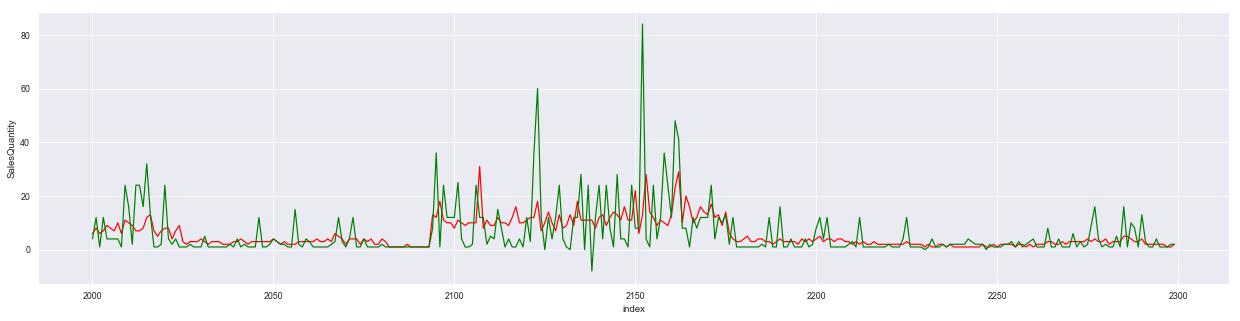

In [50]:
plt.figure(figsize=(19,5))
sns.lineplot(y="pred",x="index",data=pew_df_cb.iloc[2000:2300].reset_index(),color="red")
sns.lineplot(y="SalesQuantity",x="index",data=pew_df_cb.iloc[2000:2300].reset_index(),color="green")

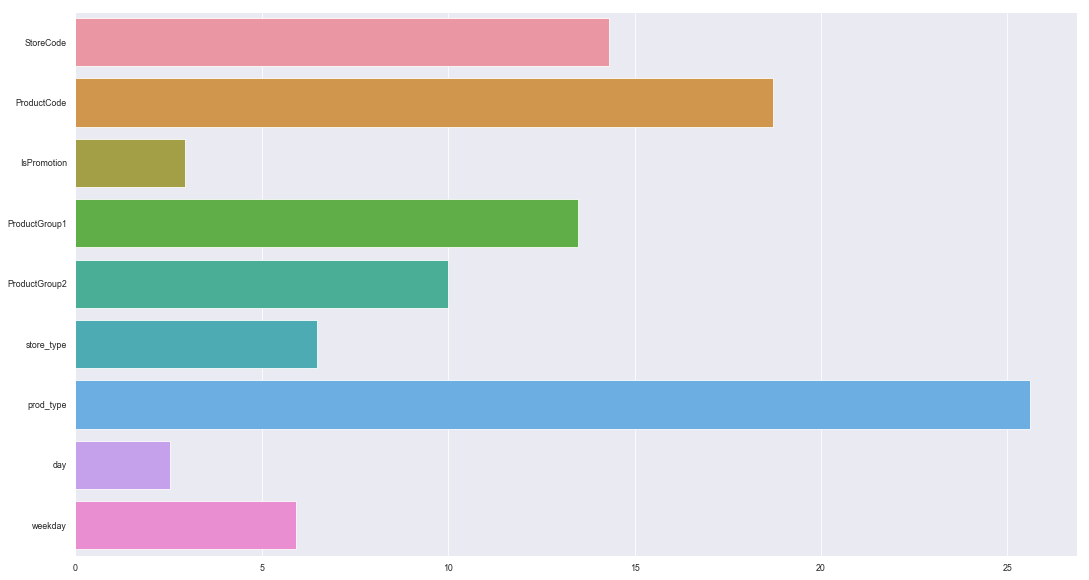

In [51]:
plt.figure(figsize=(16,10))
sns.barplot(x=model.feature_importances_,y=model.feature_names_)

## Data fix for Sklearn

In [52]:
cat_vars=["StoreCode","ProductCode","ProductGroup1","ProductGroup2","store_type","prod_type","weekday","IsPromotion","day","SalesQuantity"]
enc=OneHotEncoder()
train_spa=enc.fit_transform(train_transf[cat_vars[:-3]])
test_spa=enc.transform(test_transf[cat_vars[:-3]])

In [53]:
from scipy.sparse import hstack
train_spa=hstack((train_spa,train_transf[cat_vars[-3:-1]]))
test_spa=hstack((test_spa,test_transf[cat_vars[-3:-1]]))

# Linear Regression

4.310100704230157


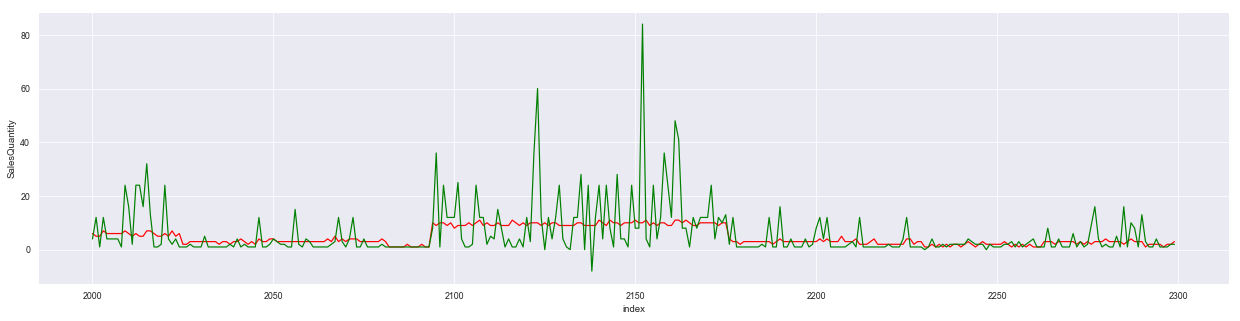

In [54]:
model_lr=LinearRegression()
model_lr.fit(train_spa,train_transf["SalesQuantity"])

preds=model_lr.predict(test_spa)
print(np.sqrt(mean_squared_error(np.round(preds),test_transf["SalesQuantity"])))
pew_df=pd.DataFrame()
pew_df["SalesQuantity"]=test_transf["SalesQuantity"]
pew_df["pred"]=np.round(preds).astype(int)

plt.figure(figsize=(19,5))
sns.lineplot(y="pred",x="index",data=pew_df.iloc[2000:2300].reset_index(),color="red")
sns.lineplot(y="SalesQuantity",x="index",data=pew_df.iloc[2000:2300].reset_index(),color="green")

# SGD

4.309856412612443


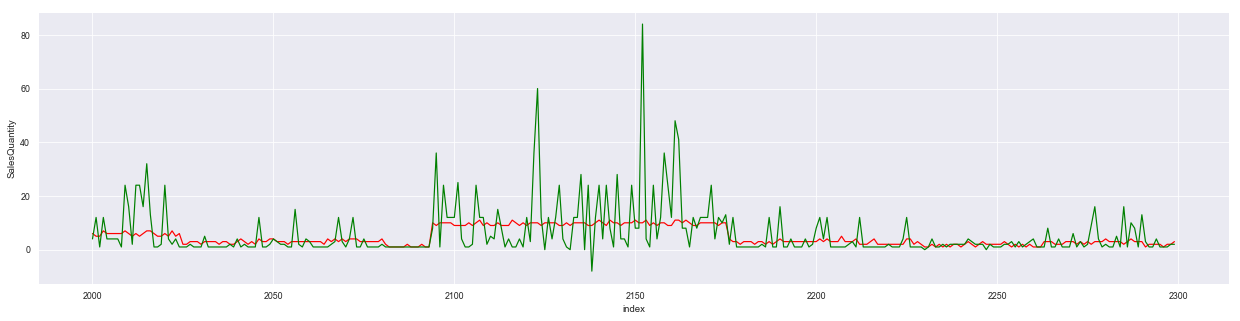

In [55]:
model_sgd=SGDRegressor()
model_sgd.fit(train_spa,train_transf["SalesQuantity"])

preds=model_sgd.predict(test_spa)
print(np.sqrt(mean_squared_error(np.round(preds),test_transf["SalesQuantity"])))
pew_df=pd.DataFrame()
pew_df["SalesQuantity"]=test_transf["SalesQuantity"]
pew_df["pred"]=np.round(preds).astype(int)

plt.figure(figsize=(19,5))
sns.lineplot(y="pred",x="index",data=pew_df.iloc[2000:2300].reset_index(),color="red")
sns.lineplot(y="SalesQuantity",x="index",data=pew_df.iloc[2000:2300].reset_index(),color="green")

In [56]:
preds=model.predict(test_transf[X_train.columns])
pew_df_cb=pd.DataFrame()
pew_df_cb["SalesQuantity"]=test_transf["SalesQuantity"]
pew_df_cb["pred"]=np.round(preds).astype(int)
print("Decision Tree :",np.sqrt(mean_squared_error(pew_df_cb.SalesQuantity,pew_df_cb.pred)))

preds=model_sgd.predict(test_spa)
print("SGD :",np.sqrt(mean_squared_error(np.round(preds),test_transf["SalesQuantity"])))
pew_df_sgd=pd.DataFrame()
pew_df_sgd["SalesQuantity"]=test_transf["SalesQuantity"]
pew_df_sgd["pred"]=np.round(preds).astype(int)

preds=model_lr.predict(test_spa)
print("LR :",np.sqrt(mean_squared_error(np.round(preds),test_transf["SalesQuantity"])))
pew_df_lr=pd.DataFrame()
pew_df_lr["SalesQuantity"]=test_transf["SalesQuantity"]
pew_df_lr["pred"]=np.round(preds).astype(int)

Decision Tree : 4.186626630108601
SGD : 4.309856412612443
LR : 4.310100704230157


In [57]:
preds=model.predict(test_transf[X_train.columns])
pew_df_cb=pd.DataFrame()
pew_df_cb["SalesQuantity"]=test_transf["SalesQuantity"]
pew_df_cb["pred"]=np.round(preds).astype(int)
print("Decision Tree :",mean_absolute_error(pew_df_cb.SalesQuantity,pew_df_cb.pred))

preds=model_sgd.predict(test_spa)
print("SGD :",mean_absolute_error(np.round(preds),test_transf["SalesQuantity"]))
pew_df_sgd=pd.DataFrame()
pew_df_sgd["SalesQuantity"]=test_transf["SalesQuantity"]
pew_df_sgd["pred"]=np.round(preds).astype(int)

preds=model_lr.predict(test_spa)
print("LR :",mean_absolute_error(np.round(preds),test_transf["SalesQuantity"]))
pew_df_lr=pd.DataFrame()
pew_df_lr["SalesQuantity"]=test_transf["SalesQuantity"]
pew_df_lr["pred"]=np.round(preds).astype(int)

Decision Tree : 1.8949277371048738
SGD : 2.01897247502969
LR : 2.05779572637851


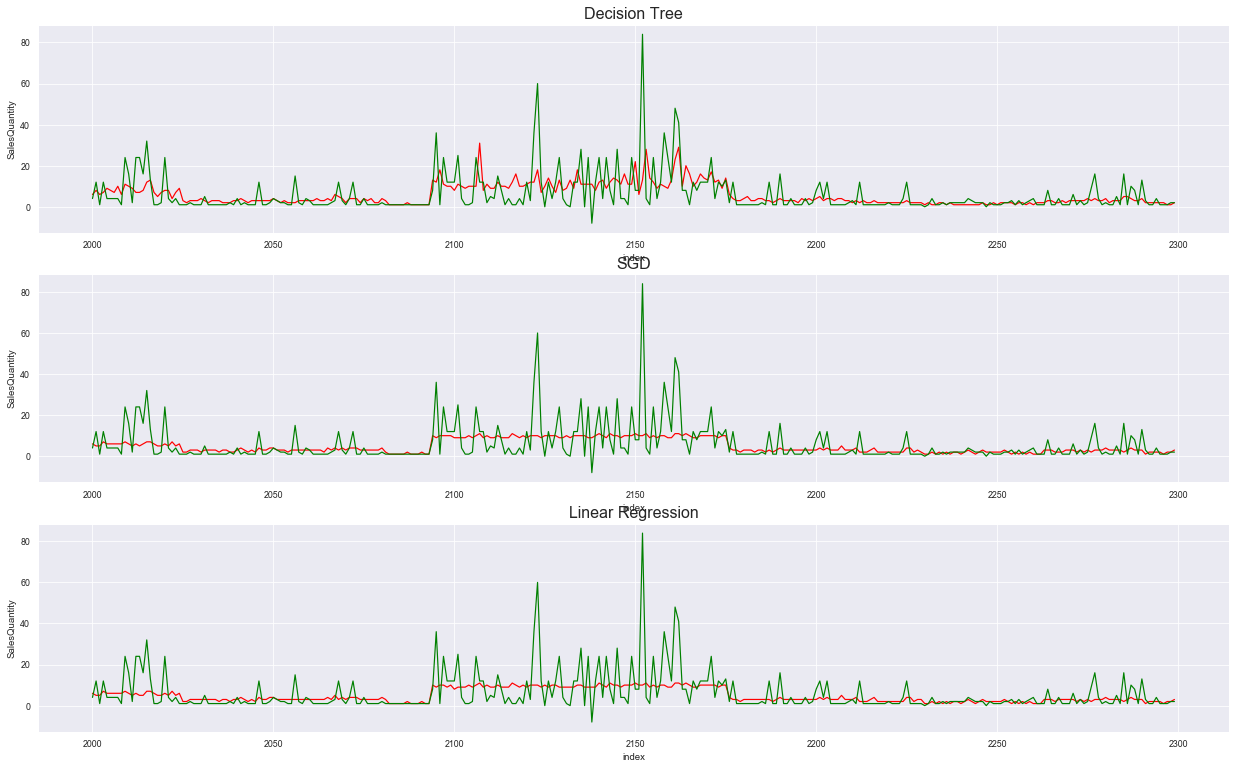

In [58]:
fig,ax=plt.subplots(nrows=3,figsize=(19,13))
sns.lineplot(y="pred",x="index",data=pew_df_cb.iloc[2000:2300].reset_index(),color="red",ax=ax[0])
sns.lineplot(y="SalesQuantity",x="index",data=pew_df_cb.iloc[2000:2300].reset_index(),color="green",ax=ax[0])
ax[0].set_title("Decision Tree",fontsize=16)

sns.lineplot(y="pred",x="index",data=pew_df_sgd.iloc[2000:2300].reset_index(),color="red",ax=ax[1])
sns.lineplot(y="SalesQuantity",x="index",data=pew_df_sgd.iloc[2000:2300].reset_index(),color="green",ax=ax[1])
ax[1].set_title("SGD",fontsize=16)

sns.lineplot(y="pred",x="index",data=pew_df_lr.iloc[2000:2300].reset_index(),color="red",ax=ax[2])
sns.lineplot(y="SalesQuantity",x="index",data=pew_df_lr.iloc[2000:2300].reset_index(),color="green",ax=ax[2])
ax[2].set_title("Linear Regression",fontsize=16);


In [59]:
prom5_index=test_transf[test_transf["Date"].between(promo_dates.iloc[4,1],promo_dates.iloc[4,2])].index

In [60]:
label=test_transf["SalesQuantity"].iloc[prom5_index]
preds=model.predict(test_transf[X_train.columns].iloc[prom5_index])
pew_df_cb=pd.DataFrame()
pew_df_cb["SalesQuantity"]=label
pew_df_cb["pred"]=np.round(preds).astype(int)
print("Decision Tree :",mean_absolute_error(label,pew_df_cb.pred))

preds=model_sgd.predict(test_spa)
preds=preds[prom5_index]
print("SGD :",mean_absolute_error(np.round(preds),label))
pew_df_sgd=pd.DataFrame()
pew_df_sgd["SalesQuantity"]=label
pew_df_sgd["pred"]=np.round(preds).astype(int)

preds=model_lr.predict(test_spa)
preds=preds[prom5_index]
print("LR :",mean_absolute_error(np.round(preds),label))
pew_df_lr=pd.DataFrame()
pew_df_lr["SalesQuantity"]=label
pew_df_lr["pred"]=np.round(preds).astype(int)

Decision Tree : 2.4019770946353223
SGD : 2.485497287522604
LR : 2.5171790235081373


In [66]:
feature_coefs={"x"+str(i):[] for i in range(7)}

for i,n in enumerate(enc.get_feature_names()):
    feature_coefs[n.split("_")[0]].append(i)
for key in feature_coefs.keys():
    overall_=[]
    for ind in feature_coefs[key]:
        overall_.append(model_lr.coef_[ind])
    feature_coefs[key]=overall_

In [67]:
[sum(feature_coefs[k]) for k in feature_coefs.keys()]

[4.133216882640234e-08,
 -4.109430395971003e-08,
 -1.0348006482530092e-06,
 -8.386321161402144e-07,
 -5.138743506938326e-06,
 -4.277770623062338e-06,
 1.2472348272923872e-06]

### Which store has more sales quantity

In [76]:
cat_vars=["StoreCode","ProductCode","ProductGroup1","ProductGroup2","store_type","prod_type","weekday","IsPromotion","day"]
store_coefs=feature_coefs["x0"]
store_index=store_coefs.index(max(store_coefs))
enc.categories_[0][store_index],max(store_coefs)

(117, 1.2011309438554605)

### Which item has more sales quantity

In [77]:
cat_vars=["StoreCode","ProductCode","ProductGroup1","ProductGroup2","store_type","prod_type","weekday","IsPromotion","day"]
item_coefs=feature_coefs["x1"]
item_index=item_coefs.index(max(item_coefs))
enc.categories_[1][item_index],max(item_coefs)

(137, 9.256194321396528)

In [87]:
model_lr.coef_[-2]

0.4529783280468405

In [90]:
cat_vars=["StoreCode","ProductCode","ProductGroup1","ProductGroup2","store_type","prod_type","weekday","IsPromotion","day"]
weekday_coefs=feature_coefs["x6"]
weekday_index=weekday_coefs.index(max(weekday_coefs))
enc.categories_[6][weekday_index],max(weekday_coefs)

(5, 0.7213441916633714)